<a href="https://colab.research.google.com/github/MRM07/EverythingDataScience/blob/master/TPOT_for_Telecom_Churning_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict the risk of Customer Churning in Telecom Data

Churning occurs when customers/subscibers stop doing business with a company or service.
Here we'll use TPOT to create an Automated ML platform to predict the churn risk.


In [0]:
!pip install tpot

In [0]:

# Import required libraries
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

In [2]:
# Loading the data
customer_churn_dataset = pd.read_csv('data2.csv')
customer_churn_dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


# EDA

In [3]:
customer_churn_dataset.groupby("gender").Churn.value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

In [4]:
#Dataypes of all the individual features
customer_churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
#Let's check for null values in the dataset
customer_churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Wrangling

The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.

In [0]:
"""
Let's create a funcion which can be used to identify the reponse variable based on user input. 
Here "Churn" prediction is the requirement.
"""
def target(df, response ):
  df.rename(columns={response: 'class'}, inplace=True)
  

In [0]:
target(customer_churn_dataset, "Churn")



At present, TPOT requires all the data to be in numerical format. As we can see below, our data set has many categorical variables which contain non-numerical values: **gender, PhoneService, Multiple lines, Partner, Dependent, PaymentMethod, Paperless, TechSupport, StreamingTV, StreamingMovies, Contract etc.**

In [8]:
for cat in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]:
    print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, customer_churn_dataset[cat].unique().size))

Number of levels in category 'gender':  2.00 
Number of levels in category 'Partner':  2.00 
Number of levels in category 'Dependents':  2.00 
Number of levels in category 'PhoneService':  2.00 
Number of levels in category 'MultipleLines':  3.00 
Number of levels in category 'InternetService':  3.00 
Number of levels in category 'OnlineSecurity':  3.00 
Number of levels in category 'OnlineBackup':  3.00 
Number of levels in category 'DeviceProtection':  3.00 
Number of levels in category 'TechSupport':  3.00 
Number of levels in category 'StreamingMovies':  3.00 
Number of levels in category 'StreamingTV':  3.00 
Number of levels in category 'Contract':  3.00 
Number of levels in category 'PaperlessBilling':  2.00 
Number of levels in category 'PaymentMethod':  4.00 


In [9]:
for cat in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]:
    print("Number of levels in category '{0}': {1} ".format(cat, customer_churn_dataset[cat].unique()))

Number of levels in category 'gender': ['Male' 'Female'] 
Number of levels in category 'Partner': ['Yes' 'No'] 
Number of levels in category 'Dependents': ['Yes' 'No'] 
Number of levels in category 'PhoneService': ['Yes' 'No'] 
Number of levels in category 'MultipleLines': ['No' 'No phone service' 'Yes'] 
Number of levels in category 'InternetService': ['No' 'DSL' 'Fiber optic'] 
Number of levels in category 'OnlineSecurity': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'OnlineBackup': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'DeviceProtection': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'TechSupport': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'StreamingMovies': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'StreamingTV': ['No internet service' 'No' 'Yes'] 
Number of levels in category 'Contract': ['One year' 'Month-to-month' 'Two year'] 
Number of levels in category 'PaperlessBi

In [0]:
customer_churn_dataset["gender"]=customer_churn_dataset["gender"].map({'Male': 0, 'Female': 1}) 
customer_churn_dataset["Partner"]= customer_churn_dataset["Partner"].map({'Yes': 0, 'No': 1})
customer_churn_dataset["Dependents"]= customer_churn_dataset["Dependents"].map({'Yes': 0, 'No': 1})
customer_churn_dataset["PhoneService"]= customer_churn_dataset["PhoneService"].map({'Yes': 0, 'No': 1})
customer_churn_dataset["MultipleLines"]= customer_churn_dataset["MultipleLines"].map({'No': 0, 'No phone service': 1, 'Yes': 2})
customer_churn_dataset["InternetService"]= customer_churn_dataset["InternetService"].map({'No': 0, 'DSL': 1, 'Fiber optic': 2 })
customer_churn_dataset["OnlineSecurity"]= customer_churn_dataset["OnlineSecurity"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["OnlineBackup"]= customer_churn_dataset["OnlineBackup"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["DeviceProtection"]= customer_churn_dataset["DeviceProtection"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["TechSupport"]= customer_churn_dataset["TechSupport"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["StreamingMovies"]= customer_churn_dataset["StreamingMovies"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["StreamingTV"]= customer_churn_dataset["StreamingTV"].map({'No internet service': 0, 'No': 1, 'Yes': 2})
customer_churn_dataset["Contract"]= customer_churn_dataset["Contract"].map({'One year': 0, 'Month-to-month': 1, 'Two year': 2})
customer_churn_dataset["PaymentMethod"]= customer_churn_dataset["PaymentMethod"].map({'Mailed check':0, 'Electronic check' :1 ,'Bank transfer (automatic)':2, 
 'Credit card (automatic)': 3})
customer_churn_dataset["PaperlessBilling"]= customer_churn_dataset["PaperlessBilling"].map({'No' :0, 'Yes': 1})


In [11]:
# customer_churn_dataset["gender"]=customer_churn_dataset["gender"].map({'Male': 0, 'Female': 1})
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,class
0,2967-MXRAV,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18.80,18.80,No
1,8992-CEUEN,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,18.85,18.85,No
2,9318-NKNFC,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,18.85,18.85,Yes
3,9975-SKRNR,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,18.90,18.90,No
4,1423-BMPBQ,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,19.00,19.00,No


In [0]:
from sklearn.model_selection import train_test_split
X= customer_churn_dataset.drop(['customerID', 'class'], axis= 1)
y= customer_churn_dataset["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [0]:
from tpot import TPOTClassifier

In [0]:
"""
We have the freedom to set up our won configuration even when automating the pipelines. 
This will help us narrow down to using only those pipelines which can explain feature importances.
"""
tpot_config = {
    'sklearn.naive_bayes.GaussianNB': {
    },
    'sklearn.ensemble.RandomForestClassifier' : {
    },
    'sklearn.ensemble.GradientBoostingClassifier':{
    },
    
    'sklearn.ensemble.ExtraTreesClassifier':{
    }
}


In [0]:
tpot = TPOTClassifier(generations= 20, verbosity=2, max_time_mins=4, max_eval_time_mins=0.04, population_size=20, config_dict= tpot_config)

In [24]:
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.7850666666666668
Generation 2 - Current best internal CV score: 0.7873777777777777
Generation 3 - Current best internal CV score: 0.7873777777777777
Generation 4 - Current best internal CV score: 0.7873777777777777
Generation 5 - Current best internal CV score: 0.7873777777777777
Generation 6 - Current best internal CV score: 0.7873777777777777
Generation 7 - Current best internal CV score: 0.7873777777777777
Generation 8 - Current best internal CV score: 0.7873777777777777
Generation 9 - Current best internal CV score: 0.7873777777777777
Generation 10 - Current best internal CV score: 0.7873777777777777
Generation 11 - Current best internal CV score: 0.7873777777777777
Generation 12 - Current best internal CV score: 0.7873777777777777
Generation 13 - Current best internal CV score: 0.7873777777777777
Generation 14 - Current best internal CV score: 0.7873777777777777
Generation 15 - Current best internal CV score: 0.7873777777777777
Gene

ValueError: ignored

In [0]:
# Get the best model
extracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [26]:
# Access it's features
extracted_best_model.feature_importances_

array([0.00827811, 0.0078505 , 0.00717343, 0.00655425, 0.04940996,
       0.0010845 , 0.0087248 , 0.01575145, 0.0145908 , 0.00597195,
       0.00906816, 0.00619363, 0.00449179, 0.01049271, 0.0059612 ,
       0.00861053, 0.01362971, 0.05483023, 0.07752095, 0.01064179,
       0.00582866, 0.00653347, 0.00494993, 0.08081045, 0.00109962,
       0.00632866, 0.00901181, 0.00902884, 0.00723537, 0.00748685,
       0.00814173, 0.01620939, 0.00572026, 0.02208106, 0.00721009,
       0.0161802 , 0.05808977, 0.0617939 , 0.00667837, 0.00666051,
       0.00727599, 0.00655105, 0.05117424, 0.0007127 , 0.00801503,
       0.03094893, 0.01153245, 0.01179733, 0.0063078 , 0.00789619,
       0.01407664, 0.00762575, 0.02036531, 0.00771773, 0.01478452,
       0.05299725, 0.0663117 ])

# IMPORTANT

*In the above example, the best model based on the pipeline was RandomForestClassifier . This model indeed has the attribute feature_importances_. In the case where the best model does not have an attribute feature_importances_, the exact same code will not work. We have to take care of such cases, ex- if our best estimator was LogisticRegeression or NaiveBayes

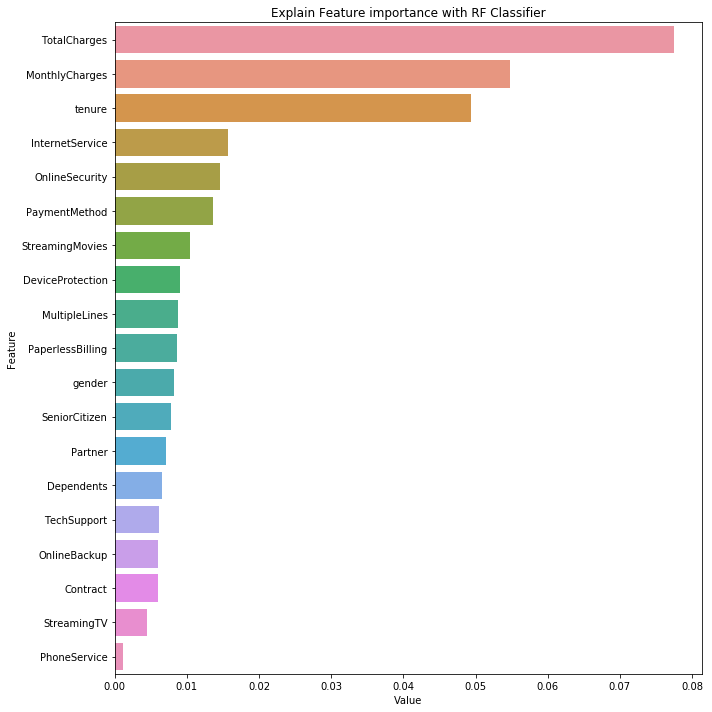

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(extracted_best_model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Explain Feature importance with RF Classifier')
plt.tight_layout()
plt.show()

